In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 6.6 MB/s eta 0:00:00


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import re
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [91]:
df = pd.read_csv("/content/spam.csv") #write your own file path
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [92]:
#check null values
df.isnull().sum()

,0
Category,0
Message,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [94]:
#find duplicates and drop (inplace=True
print("No , Null values")

df_dropped=df.drop(df[df.duplicated()].index,axis=0)

No , Null values


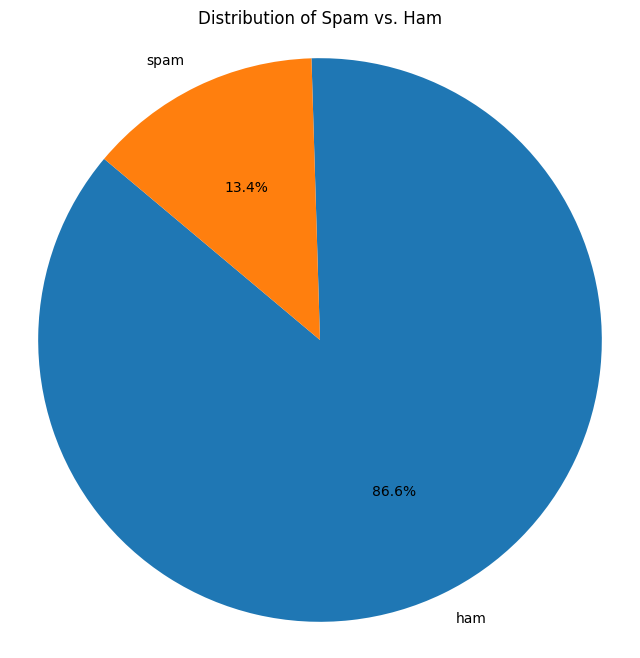

In [95]:
# Calculate the count of each label
category_counts = df['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam vs. Ham')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

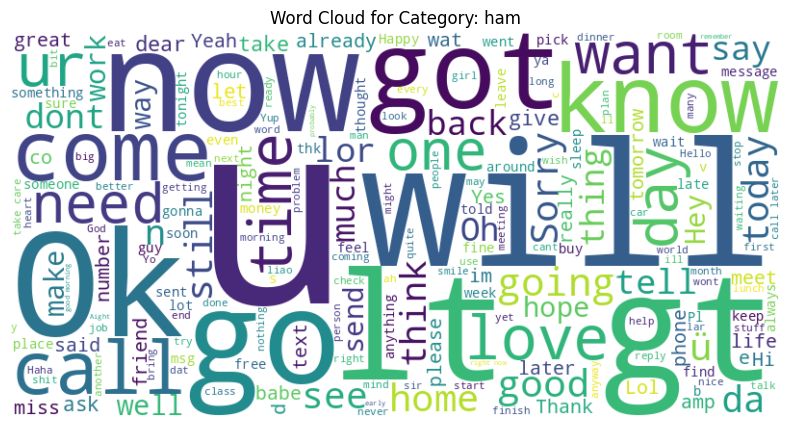

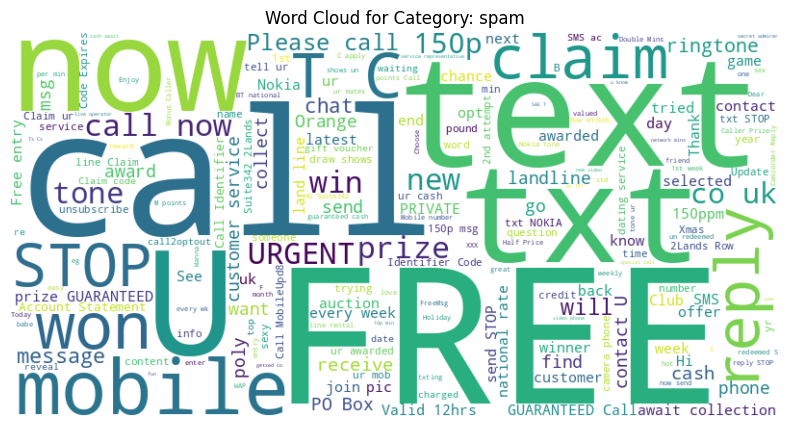

In [96]:
# Iterate through unique categories
for category in df['Category'].unique():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Category'] == category]

    # Concatenate all text data for the current category
    text = ' '.join(filtered_df['Message'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

In [97]:
le = LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [98]:
# Convert 'Text' column to lowercase
df['Message'] = df['Message'].str.lower()
df

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ü b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


In [99]:
# Remove extra white spaces from the 'Text' column
df['Message'] = df['Message'].apply(lambda x: ' '.join(x.split()))
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [100]:
# Function to remove HTML tags from text
def remove_html_tags(text):
    df_cleaned = re.sub(r'<.*?>', '', text)
    return df_cleaned

# Apply the function to the 'Text' column
df['Message'] = df['Message'].apply(remove_html_tags)

In [101]:
df

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ü b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


In [102]:
# Define a function to remove URLs using regular expressions
def remove_urls(text):
    df_cleaned = re.sub(r'http\S+|www\S+|https\S+', '', str(text))
    return df_cleaned

# Apply the function to the 'Text' column
df['Message'] = df['Message'].apply(remove_urls)

In [103]:
df

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ü b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


In [104]:
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    df_cleaned = re.sub(pattern, '', str(text))
    return df_cleaned

# Apply the function to the 'Message' column
df['Message'] = df['Message'].apply(remove_special_characters)

In [105]:
df

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will b going to esplanade fr home
5569,0,pity was in mood for that soany other suggest...
5570,0,the guy did some bitching but i acted like id ...


In [106]:
# Function to remove numeric values from text
def remove_numeric_preserve_na(text):
    if pd.isna(text):
        return text

    s = str(text)
    s = re.sub(r'\d+', '', s)
    return s

df['Message'] = df['Message'].apply(remove_numeric_preserve_na)

In [107]:
df

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1,this is the nd time we have tried contact u u...
5568,0,will b going to esplanade fr home
5569,0,pity was in mood for that soany other suggest...
5570,0,the guy did some bitching but i acted like id ...


In [108]:
# Define a function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    pattern = r'[^a-zA-Z0-9\s]'
    df_cleaned = re.sub(pattern, '', str(text))
    return df_cleaned

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_non_alphanumeric)

In [109]:
df

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1,this is the nd time we have tried contact u u...
5568,0,will b going to esplanade fr home
5569,0,pity was in mood for that soany other suggest...
5570,0,the guy did some bitching but i acted like id ...


In [110]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [111]:
# Function to replace chat words with their full forms
def replace_chat_words(text):
    words = text.split()
    replaced_words = [chat_words.get(word, word) for word in words]
    return ' '.join(replaced_words)

# Apply replace_chat_words function to 'Text' column
df['Message'] = df['Message'].apply(replace_chat_words)

In [112]:
df

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final ...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1,this is the nd time we have tried contact u u ...
5568,0,will b going to esplanade fr home
5569,0,pity was in mood for that soany other suggestions
5570,0,the guy did some bitching but i acted like id ...


In [113]:
# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['Message'] = df['Message'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
df

,Category,Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though
...,...,...
5567,1,nd time tried contact u u pound prize claim ea...
5568,0,b going esplanade fr home
5569,0,pity mood soany suggestions
5570,0,guy bitching acted like id interested buying s...


In [115]:
# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply remove_emojis function to 'Text' column
df['Message'] = df['Message'].apply(remove_emojis)

In [116]:
df

,Category,Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though
...,...,...
5567,1,nd time tried contact u u pound prize claim ea...
5568,0,b going esplanade fr home
5569,0,pity mood soany suggestions
5570,0,guy bitching acted like id interested buying s...


In [117]:
# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['Message_stemmed'] = df['Message'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))
df.head()

,Category,Message,Message_stemmed
0,0,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,ok lar joke wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say early hor u c already say,u dun say earli hor u c alreadi say
4,0,nah dont think goes usf lives around though,nah dont think goe usf live around though


In [118]:
#Convert text to numbers using bag of words
# vectorizer=CountVectorizer()
# X=vectorizer.fit_transform(df['Message_stemmed']).toarray()
# y = df['Category']\

# Convert text to numbers using bag of words
# Convert text to numbers using bag of words
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(df['Message_stemmed']).toarray()
y = df['Category']

# Split data (Count)
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(
    X_count, y, test_size=0.3, random_state=42
)

# Convert y to numpy arrays
y_train_count = y_train_count.values
y_test_count = y_test_count.values


# --- TF-IDF Vectorizer ---
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Message_stemmed'])

# Split data (TF-IDF)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf, y, test_size=0.3, random_state=42
)

# Convert y to numpy arrays
y_train_tfidf = y_train_tfidf.values
y_test_tfidf = y_test_tfidf.values

In [119]:
# Split the data
scaler = StandardScaler(with_mean=False)   # safer for sparse data
X_train_count_scaled = scaler.fit_transform(X_train_count)
X_test_count_scaled = scaler.transform(X_test_count)
X_train_tfidf_scaled = scaler.fit_transform(X_train_tfidf)
X_test_tfidf_scaled = scaler.transform(X_test_tfidf)
X_train_tfidf_scaled = X_train_tfidf_scaled.toarray()
X_test_tfidf_scaled  = X_test_tfidf_scaled.toarray()

In [120]:
import numpy as np

class NaiveBayesScratch:
    def __init__(self, alpha=1.0):
        """
        Multinomial Naive Bayes with Laplace smoothing.
        alpha: smoothing parameter (Laplace smoothing, default = 1.0)
        """
        self.alpha = alpha
        self.class_priors = None
        self.feature_likelihoods = None
        self.classes = None

    def fit(self, X, y):
        """
        X: document-term matrix (counts or TF-IDF), shape = (m, n)
        y: labels, shape = (m,)
        """
        # Handle sparse input
        if hasattr(X, "toarray"):
            X = X.toarray()

        m, n = X.shape
        self.classes = np.unique(y)
        num_classes = len(self.classes)

        # Initialize priors and likelihoods
        self.class_priors = np.zeros(num_classes)
        self.feature_likelihoods = np.zeros((num_classes, n))

        for idx, c in enumerate(self.classes):
            # Select rows for class c
            X_c = X[y == c]

            # Prior probability P(c)
            self.class_priors[idx] = X_c.shape[0] / m

            # Count words per feature in class c
            word_counts = np.sum(X_c, axis=0)  # shape (n,)

            # Apply Laplace smoothing
            self.feature_likelihoods[idx, :] = (word_counts + self.alpha) / \
                (np.sum(word_counts) + self.alpha * n)

    def predict(self, X):
        if hasattr(X, "toarray"):
            X = X.toarray()

        m, n = X.shape
        log_priors = np.log(self.class_priors)

        y_pred = []
        for i in range(m):
            # For each sample, compute log-probability for each class
            log_probs = []
            for idx, c in enumerate(self.classes):
                # log P(c) + sum(x_j * log P(w_j | c))
                log_likelihood = np.sum(X[i] * np.log(self.feature_likelihoods[idx]))
                log_prob = log_priors[idx] + log_likelihood
                log_probs.append(log_prob)

            # Pick class with highest probability
            y_pred.append(self.classes[np.argmax(log_probs)])

        return np.array(y_pred)

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y) * 100

In [121]:
alphas = [0.5, 1.0, 1.5]

# ================================
# Using CountVectorizer
# ================================
print("========== Using CountVectorizer ==========")
for alpha in alphas:
    print(f"\nTraining with α = {alpha}")
    model = NaiveBayesScratch(alpha=alpha)
    model.fit(X_train_count_scaled, y_train_count)
    y_test_pred_count = model.predict(X_test_count_scaled)

    acc = accuracy_score(y_test_count, y_test_pred_count)
    prec = precision_score(y_test_count, y_test_pred_count)
    rec = recall_score(y_test_count, y_test_pred_count)
    f1 = f1_score(y_test_count, y_test_pred_count)
    cm = confusion_matrix(y_test_count, y_test_pred_count)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:\n", cm)

# ================================
# Using TfidfVectorizer
# ================================
print("\n========== Using TfidfVectorizer ==========")
for alpha in alphas:
    print(f"\nTraining with α = {alpha}")
    model = NaiveBayesScratch(alpha=alpha)
    model.fit(X_train_tfidf_scaled, y_train_tfidf)
    y_test_pred_tfidf = model.predict(X_test_tfidf_scaled)

    acc = accuracy_score(y_test_tfidf, y_test_pred_tfidf)
    prec = precision_score(y_test_tfidf, y_test_pred_tfidf)
    rec = recall_score(y_test_tfidf, y_test_pred_tfidf)
    f1 = f1_score(y_test_tfidf, y_test_pred_tfidf)
    cm = confusion_matrix(y_test_tfidf, y_test_pred_tfidf)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:\n", cm)

========== Using CountVectorizer ==========

Training with α = 0.5
Accuracy: 0.9438
Precision: 0.7390
Recall: 0.8973
F1-score: 0.8105
Confusion Matrix:
 [[1377   71]
 [  23  201]]

Training with α = 1.0
Accuracy: 0.9450
Precision: 0.7409
Recall: 0.9062
F1-score: 0.8153
Confusion Matrix:
 [[1377   71]
 [  21  203]]

Training with α = 1.5
Accuracy: 0.9450
Precision: 0.7374
Recall: 0.9152
F1-score: 0.8167
Confusion Matrix:
 [[1375   73]
 [  19  205]]

========== Using TfidfVectorizer ==========

Training with α = 0.5
Accuracy: 0.9408
Precision: 0.7289
Recall: 0.8884
F1-score: 0.8008
Confusion Matrix:
 [[1374   74]
 [  25  199]]

Training with α = 1.0
Accuracy: 0.9444
Precision: 0.7365
Recall: 0.9107
F1-score: 0.8144
Confusion Matrix:
 [[1375   73]
 [  20  204]]

Training with α = 1.5
Accuracy: 0.9426
Precision: 0.7270
Recall: 0.9152
F1-score: 0.8103
Confusion Matrix:
 [[1371   77]
 [  19  205]]
